In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K



Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28


In [5]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [5]:
# Make data 4 dimensional, although it's only 3 dimension, because there's only greyscale, not colour
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    #x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    #x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    #input_shape = (img_rows, img_cols, 1)
    # flatten pixels out
    x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
    x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)
    input_shape = (img_rows*img_cols, )

In [6]:
print("x_train reshaped:", x_train.shape)
print("x_test reshaped:", x_test.shape)
print("input_shape:", input_shape)

x_train reshaped: (60000, 784)
x_test reshaped: (10000, 784)
input_shape: (784,)


In [7]:
# Make into floats between 0-1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert mnist numbers to one-hot categorical
print("converting y labels to one-hot categorical")
print("# before reshape")
print('first y value:', y_train[0])
print('y shape:', y_train.shape)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("# after reshape")

print('y_train shape after reshape:', y_train.shape)
print('first y value after reshape:', y_train[0])

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


converting y labels to one-hot categorical
# before reshape
first y value: 5
y shape: (60000,)
# after reshape
y_train shape after reshape: (60000, 10)
first y value after reshape: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
60000 train samples
10000 test samples


In [8]:
# Do a network
model = Sequential()
model.add(Dense(32, input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total para

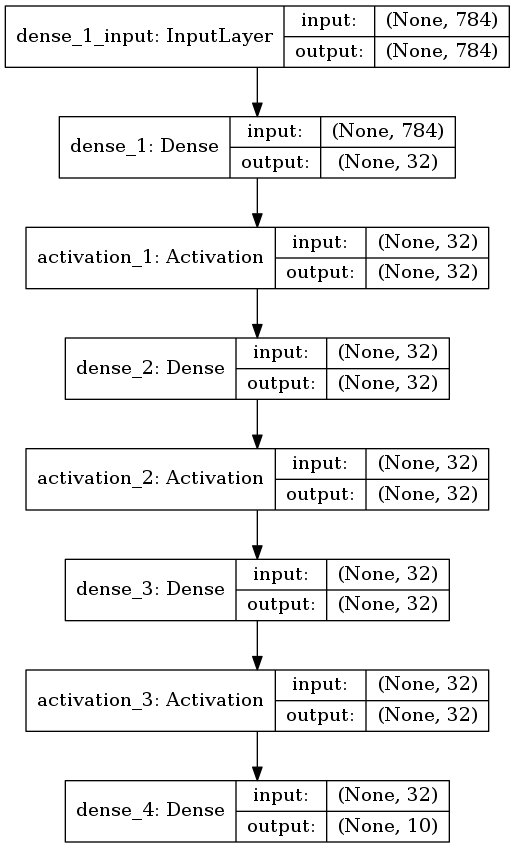

In [11]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

from IPython.display import Image
Image("model.png")

In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s - loss: 0.4992 - acc: 0.8491 - val_loss: 0.2299 - val_acc: 0.9307
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.2048 - acc: 0.9406 - val_loss: 0.1792 - val_acc: 0.9489
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.1657 - acc: 0.9519 - val_loss: 0.1629 - val_acc: 0.9539
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.1425 - acc: 0.9579 - val_loss: 0.1464 - val_acc: 0.9553
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 0.1259 - acc: 0.9626 - val_loss: 0.1298 - val_acc: 0.9615
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.1114 - acc: 0.9674 - val_loss: 0.1227 - val_acc: 0.9629
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.1021 - acc: 0.9700 - val_loss: 0.1184 - val_acc: 0.9643
Epoch 8/10
60000/60000 [==============================] - 2s 

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.103060656899
Test accuracy: 0.9691


In [14]:
# save the model
model.save('mnist-model.h5')